# Inspect fits_df from assembled_data.pickle

This notebook inspects the sigmoidal transition fits stored in `assembled_data.pickle`.

In [1]:
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import dill

DATAFOLDER = Path("..//data")

## Load assembled_data.pickle

In [2]:
# Load from assembly script
with open(DATAFOLDER / "assembled_data.pickle", "rb") as f:
    assembled = dill.load(f)

print("Keys in assembled_data.pickle:")
print(list(assembled.keys()))

Keys in assembled_data.pickle:
['x_array', 'snips_photo', 'snips_behav', 'pca_transformed', 'fits_df', 'z_dep45', 'metadata', 'params', 'snips_behav_raw']


In [3]:
# Check if fits_df exists
if "fits_df" in assembled:
    print("✓ fits_df found in assembled_data.pickle")
    print(f"Type: {type(assembled['fits_df'])}")
    
    if isinstance(assembled['fits_df'], dict):
        print(f"\nKeys in fits_df: {list(assembled['fits_df'].keys())}")
    else:
        print(f"\nfits_df is not a dict, it's a {type(assembled['fits_df'])}")
else:
    print("⚠️ No 'fits_df' key found in assembled_data.pickle")
    print("Available keys:", list(assembled.keys()))

✓ fits_df found in assembled_data.pickle
Type: <class 'pandas.core.frame.DataFrame'>

fits_df is not a dict, it's a <class 'pandas.core.frame.DataFrame'>


## Inspect fits_df Structure

In [4]:
# If fits_df exists, extract the dataframes
if "fits_df" in assembled:
    fits_df = assembled["fits_df"]
    
    if isinstance(fits_df, dict):
        # Extract each fit type
        for key in fits_df.keys():
            df = fits_df[key]
            print(f"\n{key}:")
            print(f"  Type: {type(df)}")
            print(f"  Shape: {df.shape if hasattr(df, 'shape') else 'N/A'}")
            
            if isinstance(df, pd.DataFrame):
                print(f"  Columns: {df.columns.tolist()}")
    else:
        print(f"fits_df is a {type(fits_df)}, not a dict")
        print(f"Shape: {fits_df.shape if hasattr(fits_df, 'shape') else 'N/A'}")
        if isinstance(fits_df, pd.DataFrame):
            print(f"Columns: {fits_df.columns.tolist()}")

fits_df is a <class 'pandas.core.frame.DataFrame'>, not a dict
Shape: (8, 10)
Columns: ['id', 'A', 'L', 'x0_norm', 'x0_orig', 'k', 'model', 'r_squared', 'success', 'note']


## Examine Fit Parameters

In [5]:
# Look at cluster_raw fits if they exist
if "fits_df" in assembled:
    if isinstance(fits_df, dict) and "fits_df_cluster_raw" in fits_df:
        cluster_raw = fits_df["fits_df_cluster_raw"]
        
        print("cluster_raw fit parameters:")
        print(f"Shape: {cluster_raw.shape}")
        print(f"\nColumns: {cluster_raw.columns.tolist()}")
        print(f"\nFirst few rows:")
        display(cluster_raw.head())
        
        print(f"\nData types:")
        print(cluster_raw.dtypes)
    elif isinstance(fits_df, pd.DataFrame):
        print("fits_df columns:")
        print(fits_df.columns.tolist())
        print(f"\nFirst few rows:")
        display(fits_df.head())

fits_df columns:
['id', 'A', 'L', 'x0_norm', 'x0_orig', 'k', 'model', 'r_squared', 'success', 'note']

First few rows:


,id,A,L,x0_norm,x0_orig,k,model,r_squared,success,note
0,PB26,-0.018830,0.923460,-0.087254,22.766043,-10.000000,logistic4,0.799788,True,
2,PB30,0.083253,1.030909,-0.842827,12.080631,-10.000000,logistic4,0.661720,True,
3,PB31,-0.027289,0.986766,-0.035364,23.499884,-4.822829,logistic4,0.785102,True,
4,PB46,0.065452,0.649679,-0.304863,19.688586,-10.000000,logistic4,0.343041,True,
6,PB71,0.048542,0.949934,-0.742174,13.504078,-10.000000,logistic4,0.670661,True,


In [6]:
# Check for all three fit types
if "fits_df" in assembled and isinstance(fits_df, dict):
    fit_types = ["fits_df_cluster_raw", "fits_df_clusterness", "fits_df_euclidean"]
    
    for fit_type in fit_types:
        if fit_type in fits_df:
            df = fits_df[fit_type]
            print(f"\n{'='*60}")
            print(f"{fit_type}")
            print('='*60)
            print(f"Shape: {df.shape}")
            print(f"Columns: {df.columns.tolist()}")
            print(f"\nSample data:")
            display(df.head(3))
        else:
            print(f"\n⚠️ {fit_type} not found in fits_df")

## Load Old Sigmoidal Fits for Comparison

In [7]:
# Load from old sigmoidal_fits pickle
with open(DATAFOLDER / "sigmoidal_fits.pickle", "rb") as f:
    old_fits = dill.load(f)

print("Keys in sigmoidal_fits.pickle:")
print(list(old_fits.keys()))
print(f"\nType: {type(old_fits)}")

Keys in sigmoidal_fits.pickle:
['fits_df_cluster_raw', 'fits_df_clusterness', 'fits_df_euclidean']

Type: <class 'dict'>


In [8]:
# Inspect old fits structure
if isinstance(old_fits, dict):
    for key in old_fits.keys():
        df = old_fits[key]
        print(f"\n{key}:")
        print(f"  Type: {type(df)}")
        print(f"  Shape: {df.shape if hasattr(df, 'shape') else 'N/A'}")
        
        if isinstance(df, pd.DataFrame):
            print(f"  Columns: {df.columns.tolist()}")


fits_df_cluster_raw:
  Type: <class 'pandas.core.frame.DataFrame'>
  Shape: (8, 9)
  Columns: ['id', 'A', 'L', 'x0_norm', 'x0_orig', 'k', 'model', 'success', 'note']

fits_df_clusterness:
  Type: <class 'pandas.core.frame.DataFrame'>
  Shape: (9, 9)
  Columns: ['id', 'A', 'L', 'x0_norm', 'x0_orig', 'k', 'model', 'success', 'note']

fits_df_euclidean:
  Type: <class 'pandas.core.frame.DataFrame'>
  Shape: (8, 9)
  Columns: ['id', 'A', 'L', 'x0_norm', 'x0_orig', 'k', 'model', 'success', 'note']


In [9]:
# Show details of each old fit type
old_fit_types = ["fits_df_cluster_raw", "fits_df_clusterness", "fits_df_euclidean"]

for fit_type in old_fit_types:
    if fit_type in old_fits:
        df = old_fits[fit_type]
        print(f"\n{'='*60}")
        print(f"OLD: {fit_type}")
        print('='*60)
        print(f"Shape: {df.shape}")
        print(f"Columns: {df.columns.tolist()}")
        print(f"\nFirst few rows:")
        display(df.head(3))
    else:
        print(f"\n⚠️ {fit_type} not found in old fits")


OLD: fits_df_cluster_raw
Shape: (8, 9)
Columns: ['id', 'A', 'L', 'x0_norm', 'x0_orig', 'k', 'model', 'success', 'note']

First few rows:


,id,A,L,x0_norm,x0_orig,k,model,success,note
0,PB26,0.024489,0.923220,-0.095859,22.644345,-10.000000,logistic4,True,
2,PB30,0.083253,1.030909,-0.842827,12.080631,-10.000000,logistic4,True,
3,PB31,-0.027289,0.986766,-0.035364,23.499883,-4.822829,logistic4,True,



OLD: fits_df_clusterness
Shape: (9, 9)
Columns: ['id', 'A', 'L', 'x0_norm', 'x0_orig', 'k', 'model', 'success', 'note']

First few rows:


,id,A,L,x0_norm,x0_orig,k,model,success,note
0,PB26,0.388609,0.560073,-0.007580,23.892806,-10.000000,logistic4,True,
2,PB30,0.425775,0.630955,-1.077149,8.766808,-2.230415,logistic4,True,
3,PB31,0.341150,0.617705,-0.082812,22.828862,-3.168138,logistic4,True,



OLD: fits_df_euclidean
Shape: (8, 9)
Columns: ['id', 'A', 'L', 'x0_norm', 'x0_orig', 'k', 'model', 'success', 'note']

First few rows:


,id,A,L,x0_norm,x0_orig,k,model,success,note
0,PB26,-0.007914,0.625012,-0.163980,21.680978,-10.000000,logistic4,True,
2,PB30,0.019109,0.881216,-1.114062,8.244790,-5.003872,logistic4,True,
3,PB31,-0.004493,0.939489,-0.328737,19.350953,-3.953735,logistic4,True,


## Side-by-Side Comparison

In [10]:
# Compare new vs old fits for cluster_raw
if "fits_df" in assembled and isinstance(fits_df, dict):
    if "fits_df_cluster_raw" in fits_df and "fits_df_cluster_raw" in old_fits:
        new_df = fits_df["fits_df_cluster_raw"]
        old_df = old_fits["fits_df_cluster_raw"]
        
        print("CLUSTER_RAW COMPARISON")
        print("="*60)
        print(f"\nNew fits shape: {new_df.shape}")
        print(f"Old fits shape: {old_df.shape}")
        
        print(f"\nNew columns: {new_df.columns.tolist()}")
        print(f"Old columns: {old_df.columns.tolist()}")
        
        print(f"\nNew rat IDs: {sorted(new_df['id'].unique()) if 'id' in new_df.columns else 'N/A'}")
        print(f"Old rat IDs: {sorted(old_df['id'].unique()) if 'id' in old_df.columns else 'N/A'}")
        
        # Check for matching IDs
        if 'id' in new_df.columns and 'id' in old_df.columns:
            new_ids = set(new_df['id'].unique())
            old_ids = set(old_df['id'].unique())
            
            print(f"\nCommon IDs: {len(new_ids & old_ids)}")
            print(f"Only in new: {sorted(new_ids - old_ids)}")
            print(f"Only in old: {sorted(old_ids - new_ids)}")

## Visual Comparison of Fit Parameters

In [11]:
# Create merged dataset for comparison
if "fits_df" in assembled and isinstance(fits_df, dict):
    if "fits_df_cluster_raw" in fits_df and "fits_df_cluster_raw" in old_fits:
        new_df = fits_df["fits_df_cluster_raw"]
        old_df = old_fits["fits_df_cluster_raw"]
        
        # Merge on rat ID
        if 'id' in new_df.columns and 'id' in old_df.columns:
            comparison = old_df.merge(new_df, on='id', suffixes=('_old', '_new'))
            
            print(f"Successfully matched {len(comparison)} rats")
            
            # Compare transition points
            if 'x0_orig_old' in comparison.columns and 'x0_orig_new' in comparison.columns:
                fig, axes = plt.subplots(1, 2, figsize=(14, 5))
                
                # Scatter plot
                axes[0].scatter(comparison['x0_orig_old'], comparison['x0_orig_new'], 
                               alpha=0.6, s=80, edgecolors='black', linewidth=0.5)
                
                # Perfect match line
                lim = [min(comparison['x0_orig_old'].min(), comparison['x0_orig_new'].min()),
                       max(comparison['x0_orig_old'].max(), comparison['x0_orig_new'].max())]
                axes[0].plot(lim, lim, 'r--', alpha=0.5, linewidth=2, label='Perfect match')
                
                axes[0].set_xlabel('Old x0_orig (transition point)', fontsize=12)
                axes[0].set_ylabel('New x0_orig (transition point)', fontsize=12)
                axes[0].set_title('Transition Point Comparison', fontsize=14, fontweight='bold')
                axes[0].legend()
                axes[0].grid(alpha=0.3)
                sns.despine(ax=axes[0])
                
                # Difference histogram
                diff = comparison['x0_orig_new'] - comparison['x0_orig_old']
                axes[1].hist(diff, bins=20, edgecolor='black', alpha=0.7, color='steelblue')
                axes[1].axvline(0, color='red', linestyle='--', linewidth=2, alpha=0.7, label='No difference')
                axes[1].set_xlabel('Difference (new - old)', fontsize=12)
                axes[1].set_ylabel('Frequency', fontsize=12)
                axes[1].set_title('Distribution of Differences', fontsize=14, fontweight='bold')
                axes[1].legend()
                axes[1].grid(alpha=0.3, axis='y')
                sns.despine(ax=axes[1])
                
                plt.tight_layout()
                plt.show()
                
                print(f"\nTransition point statistics:")
                print(f"  Mean difference: {diff.mean():.2f} trials")
                print(f"  Std difference: {diff.std():.2f} trials")
                print(f"  Max absolute difference: {diff.abs().max():.2f} trials")
                print(f"  Identical values: {(diff == 0).sum()} / {len(diff)}")

In [12]:
# Compare steepness parameter (k)
if "fits_df" in assembled and isinstance(fits_df, dict):
    if "fits_df_cluster_raw" in fits_df and "fits_df_cluster_raw" in old_fits:
        if 'k_old' in comparison.columns and 'k_new' in comparison.columns:
            fig, axes = plt.subplots(1, 2, figsize=(14, 5))
            
            # Scatter plot
            axes[0].scatter(comparison['k_old'], comparison['k_new'], 
                           alpha=0.6, s=80, edgecolors='black', linewidth=0.5)
            
            # Perfect match line
            lim = [min(comparison['k_old'].min(), comparison['k_new'].min()),
                   max(comparison['k_old'].max(), comparison['k_new'].max())]
            axes[0].plot(lim, lim, 'r--', alpha=0.5, linewidth=2, label='Perfect match')
            
            axes[0].set_xlabel('Old k (steepness)', fontsize=12)
            axes[0].set_ylabel('New k (steepness)', fontsize=12)
            axes[0].set_title('Steepness Comparison', fontsize=14, fontweight='bold')
            axes[0].legend()
            axes[0].grid(alpha=0.3)
            sns.despine(ax=axes[0])
            
            # Difference histogram
            diff_k = comparison['k_new'] - comparison['k_old']
            axes[1].hist(diff_k, bins=20, edgecolor='black', alpha=0.7, color='coral')
            axes[1].axvline(0, color='red', linestyle='--', linewidth=2, alpha=0.7, label='No difference')
            axes[1].set_xlabel('Difference (new - old)', fontsize=12)
            axes[1].set_ylabel('Frequency', fontsize=12)
            axes[1].set_title('Distribution of k Differences', fontsize=14, fontweight='bold')
            axes[1].legend()
            axes[1].grid(alpha=0.3, axis='y')
            sns.despine(ax=axes[1])
            
            plt.tight_layout()
            plt.show()
            
            print(f"\nSteepness (k) statistics:")
            print(f"  Mean difference: {diff_k.mean():.4f}")
            print(f"  Std difference: {diff_k.std():.4f}")
            print(f"  Max absolute difference: {diff_k.abs().max():.4f}")
            print(f"  Correlation: {comparison['k_old'].corr(comparison['k_new']):.4f}")

## Detailed Value Comparison Table

In [13]:
# Show detailed comparison for all rats
if "fits_df" in assembled and isinstance(fits_df, dict):
    if "fits_df_cluster_raw" in fits_df and "fits_df_cluster_raw" in old_fits:
        if 'x0_orig_old' in comparison.columns and 'x0_orig_new' in comparison.columns:
            # Create comparison table
            comp_table = comparison[['id', 'x0_orig_old', 'x0_orig_new']].copy()
            comp_table['x0_diff'] = comp_table['x0_orig_new'] - comp_table['x0_orig_old']
            
            if 'k_old' in comparison.columns and 'k_new' in comparison.columns:
                comp_table['k_old'] = comparison['k_old']
                comp_table['k_new'] = comparison['k_new']
                comp_table['k_diff'] = comparison['k_new'] - comparison['k_old']
            
            # Sort by absolute difference
            comp_table = comp_table.assign(abs_x0_diff=comp_table['x0_diff'].abs())
            comp_table = comp_table.sort_values('abs_x0_diff', ascending=False)
            comp_table = comp_table.drop('abs_x0_diff', axis=1)
            
            print("All rats comparison (sorted by largest x0 difference):")
            print("="*60)
            display(comp_table)

## Comprehensive x0_orig Comparison Across All Fit Types

In [19]:
# Create comprehensive table with x0_orig from all fit types
if "fits_df" in assembled and isinstance(fits_df, dict):
    fit_types = ["fits_df_cluster_raw", "fits_df_clusterness", "fits_df_euclidean"]
    
    # Start with rat IDs from cluster_raw (most common)
    if "fits_df_cluster_raw" in fits_df and 'id' in fits_df["fits_df_cluster_raw"].columns:
        all_ids = sorted(fits_df["fits_df_cluster_raw"]['id'].unique())
        x0_comparison = pd.DataFrame({'id': all_ids})
        
        # Add new fits x0_orig for each fit type
        for fit_type in fit_types:
            if fit_type in fits_df:
                df = fits_df[fit_type]
                if 'id' in df.columns and 'x0_orig' in df.columns:
                    # Clean label name
                    label = fit_type.replace('fits_df_', '').replace('_', ' ').title()
                    x0_comparison = x0_comparison.merge(
                        df[['id', 'x0_orig']],
                        on='id',
                        how='left',
                        suffixes=('', f'_{fit_type}')
                    )
                    # Rename to descriptive label
                    x0_comparison.rename(columns={'x0_orig': f'NEW_{label}'}, inplace=True)
        
        # Add old fits x0_orig for each fit type
        for fit_type in fit_types:
            if fit_type in old_fits:
                df = old_fits[fit_type]
                if 'id' in df.columns and 'x0_orig' in df.columns:
                    label = fit_type.replace('fits_df_', '').replace('_', ' ').title()
                    x0_comparison = x0_comparison.merge(
                        df[['id', 'x0_orig']],
                        on='id',
                        how='left',
                        suffixes=('', f'_old_{fit_type}')
                    )
                    # Rename to descriptive label
                    col_name = [c for c in x0_comparison.columns if c.startswith('x0_orig')][-1]
                    x0_comparison.rename(columns={col_name: f'OLD_{label}'}, inplace=True)
        
        # Calculate differences for each fit type
        for fit_type in fit_types:
            label = fit_type.replace('fits_df_', '').replace('_', ' ').title()
            new_col = f'NEW_{label}'
            old_col = f'OLD_{label}'
            
            if new_col in x0_comparison.columns and old_col in x0_comparison.columns:
                x0_comparison[f'Diff_{label}'] = x0_comparison[new_col] - x0_comparison[old_col]
        
        print("x0_orig values across all fit types (NEW vs OLD)")
        print("="*80)
        print(f"Total rats: {len(x0_comparison)}")
        print("\nColumn guide:")
        print("  NEW_* = from assembled_data.pickle")
        print("  OLD_* = from sigmoidal_fits.pickle")
        print("  Diff_* = NEW - OLD")
        print("\n")
        
        # Display the table with better formatting
        display(x0_comparison.style.format({
            col: '{:.2f}' for col in x0_comparison.columns if col != 'id'
        }).background_gradient(subset=[col for col in x0_comparison.columns if 'Diff_' in col], cmap='RdYlGn_r', vmin=-5, vmax=5))

In [15]:
# Summary statistics for differences
if "fits_df" in assembled and isinstance(fits_df, dict):
    diff_cols = [col for col in x0_comparison.columns if 'Diff_' in col]
    
    if diff_cols:
        print("\nSummary of x0_orig differences (NEW - OLD):")
        print("="*80)
        
        for col in diff_cols:
            fit_type = col.replace('Diff_', '')
            print(f"\n{fit_type}:")
            print(f"  Mean difference: {x0_comparison[col].mean():.3f} trials")
            print(f"  Std difference: {x0_comparison[col].std():.3f} trials")
            print(f"  Max absolute difference: {x0_comparison[col].abs().max():.3f} trials")
            print(f"  Identical values: {(x0_comparison[col] == 0).sum()} / {x0_comparison[col].notna().sum()}")
            print(f"  Missing values: {x0_comparison[col].isna().sum()}")

## Summary Statistics

In [16]:
# Get summary statistics for each fit type
if "fits_df" in assembled and isinstance(fits_df, dict):
    for fit_type in ["fits_df_cluster_raw", "fits_df_clusterness", "fits_df_euclidean"]:
        if fit_type in fits_df:
            df = fits_df[fit_type]
            print(f"\n{'='*60}")
            print(f"{fit_type} - Summary Statistics")
            print('='*60)
            
            if isinstance(df, pd.DataFrame):
                print(f"\nNumber of rats: {df['id'].nunique() if 'id' in df.columns else 'N/A'}")
                
                # Check for key fit parameters
                key_params = ['x0_orig', 'k', 'L', 'b']
                available_params = [p for p in key_params if p in df.columns]
                
                if available_params:
                    print(f"\nFit parameters present: {available_params}")
                    print(f"\nParameter statistics:")
                    display(df[available_params].describe())

## Visualize Fit Parameters

In [17]:
# Plot distribution of transition points
if "fits_df" in assembled and isinstance(fits_df, dict):
    if "fits_df_cluster_raw" in fits_df:
        cluster_raw = fits_df["fits_df_cluster_raw"]
        
        if 'x0_orig' in cluster_raw.columns:
            fig, ax = plt.subplots(figsize=(8, 5))
            
            ax.hist(cluster_raw['x0_orig'].dropna(), bins=20, edgecolor='black', alpha=0.7)
            ax.set_xlabel('Transition Point (x0_orig)', fontsize=12)
            ax.set_ylabel('Frequency', fontsize=12)
            ax.set_title('Distribution of Transition Points (cluster_raw)', fontsize=14)
            sns.despine(ax=ax)
            
            print(f"Mean transition point: {cluster_raw['x0_orig'].mean():.2f} trials")
            print(f"Median transition point: {cluster_raw['x0_orig'].median():.2f} trials")
            
            plt.tight_layout()
            plt.show()

In [18]:
# Plot steepness parameter distribution
if "fits_df" in assembled and isinstance(fits_df, dict):
    if "fits_df_cluster_raw" in fits_df:
        cluster_raw = fits_df["fits_df_cluster_raw"]
        
        if 'k' in cluster_raw.columns:
            fig, ax = plt.subplots(figsize=(8, 5))
            
            ax.hist(cluster_raw['k'].dropna(), bins=20, edgecolor='black', alpha=0.7)
            ax.set_xlabel('Steepness (k)', fontsize=12)
            ax.set_ylabel('Frequency', fontsize=12)
            ax.set_title('Distribution of Transition Steepness (cluster_raw)', fontsize=14)
            sns.despine(ax=ax)
            
            print(f"Mean steepness: {cluster_raw['k'].mean():.3f}")
            print(f"Median steepness: {cluster_raw['k'].median():.3f}")
            
            plt.tight_layout()
            plt.show()

In [22]:
fits_df.loc[:, ["id", "x0_orig"]]

,id,x0_orig
0,PB26,22.766043
2,PB30,12.080631
3,PB31,23.499884
4,PB46,19.688586
6,PB71,13.504078
7,PB72,11.479045
8,PB73,17.268613
9,PB75,18.618454


In [23]:
old_fits["fits_df_cluster_raw"].loc[:, ["id", "x0_orig"]]

,id,x0_orig
0,PB26,22.644345
2,PB30,12.080631
3,PB31,23.499883
4,PB46,19.688587
6,PB71,13.504078
7,PB72,11.479045
8,PB73,17.268613
9,PB75,26.065886


## Deep Dive: Why Does PB75's Fit Differ by 7.5 Trials?

Investigate the cluster transition data for PB75 to understand why the recalculated fit (x0=18.6) differs so much from the original (x0=26.1).

In [26]:
# Extract PB75 data from assembled_data
x_array = assembled["x_array"]

# Filter to PB75, deplete + 45NaCl
pb75 = x_array.query("id == 'PB75' & condition == 'deplete' & infusiontype == '45NaCl'").copy()

print(f"PB75 data:")
print(f"  Total trials: {len(pb75)}")
print(f"  Cluster 0 trials: {(pb75.cluster_photo == 0).sum()}")
print(f"  Cluster 1 trials: {(pb75.cluster_photo == 1).sum()}")

# Get transition points
x0_new = fits_df.query("id == 'PB75'")['x0_orig'].values[0]
x0_old = old_fits["fits_df_cluster_raw"].query("id == 'PB75'")['x0_orig'].values[0]

print(f"\nTransition points:")
print(f"  NEW (assembled_data): {x0_new:.2f}")
print(f"  OLD (sigmoidal_fits): {x0_old:.2f}")
print(f"  Difference: {x0_new - x0_old:.2f} trials")

PB75 data:
  Total trials: 49
  Cluster 0 trials: 13
  Cluster 1 trials: 36

Transition points:
  NEW (assembled_data): 18.62
  OLD (sigmoidal_fits): 26.07
  Difference: -7.45 trials


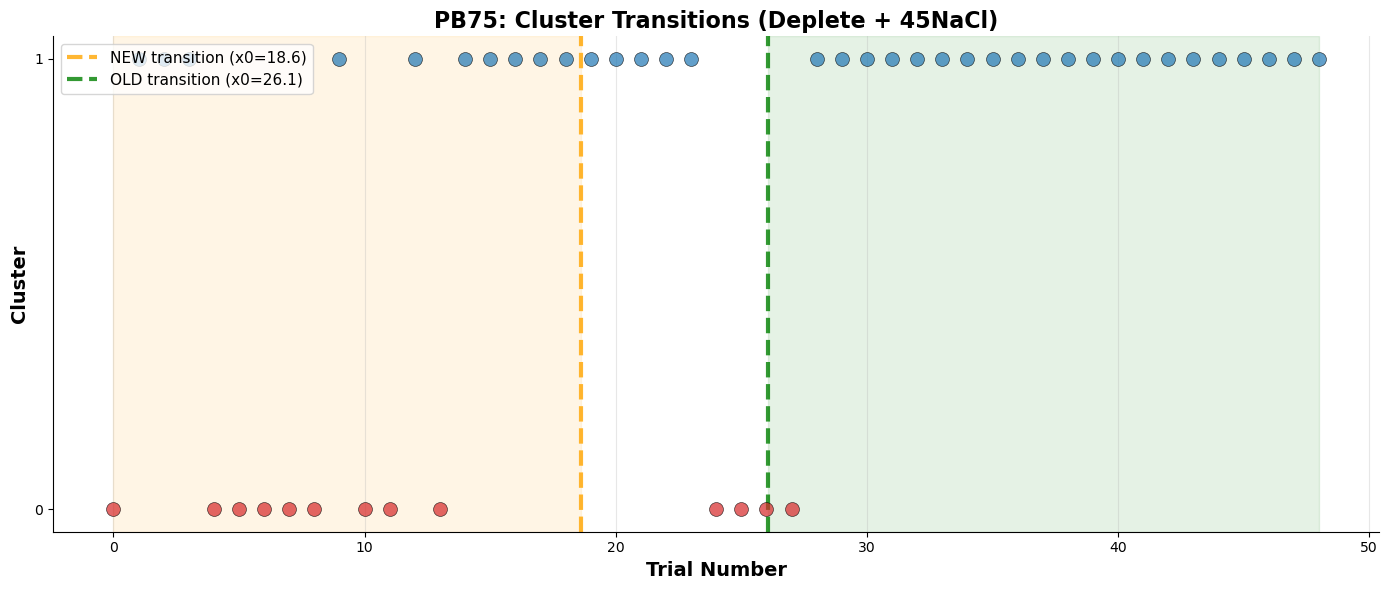


Visual inspection:
  Orange line (NEW): x0=18.6 - where assembled_data thinks transition occurs
  Green line (OLD): x0=26.1 - where sigmoidal_fits thinks transition occurs
  Difference: 7.4 trials


In [27]:
# Plot cluster membership over trials for PB75
fig, ax = plt.subplots(figsize=(14, 6))

# Plot cluster membership
trials = pb75['trial'].values
clusters = pb75['cluster_photo'].values

# Color by cluster
colors_clusters = ['#d62728', '#1f77b4']  # Red for cluster 0, blue for cluster 1
for trial, cluster in zip(trials, clusters):
    ax.scatter(trial, cluster, c=colors_clusters[int(cluster)], s=100, alpha=0.7, 
              edgecolors='black', linewidth=0.5, zorder=3)

# Mark both transition points
ax.axvline(x0_new, color='orange', linestyle='--', linewidth=3, alpha=0.8,
          label=f'NEW transition (x0={x0_new:.1f})', zorder=2)
ax.axvline(x0_old, color='green', linestyle='--', linewidth=3, alpha=0.8,
          label=f'OLD transition (x0={x0_old:.1f})', zorder=2)

# Add shaded regions
ax.axvspan(0, x0_new, alpha=0.1, color='orange', zorder=1)
ax.axvspan(x0_old, trials.max(), alpha=0.1, color='green', zorder=1)

ax.set_xlabel('Trial Number', fontsize=14, fontweight='bold')
ax.set_ylabel('Cluster', fontsize=14, fontweight='bold')
ax.set_yticks([0, 1])
ax.set_title('PB75: Cluster Transitions (Deplete + 45NaCl)', fontsize=16, fontweight='bold')
ax.legend(fontsize=11, loc='upper left')
ax.grid(alpha=0.3, axis='x')
sns.despine(ax=ax)

plt.tight_layout()
plt.show()

print(f"\nVisual inspection:")
print(f"  Orange line (NEW): x0={x0_new:.1f} - where assembled_data thinks transition occurs")
print(f"  Green line (OLD): x0={x0_old:.1f} - where sigmoidal_fits thinks transition occurs")
print(f"  Difference: {abs(x0_new - x0_old):.1f} trials")

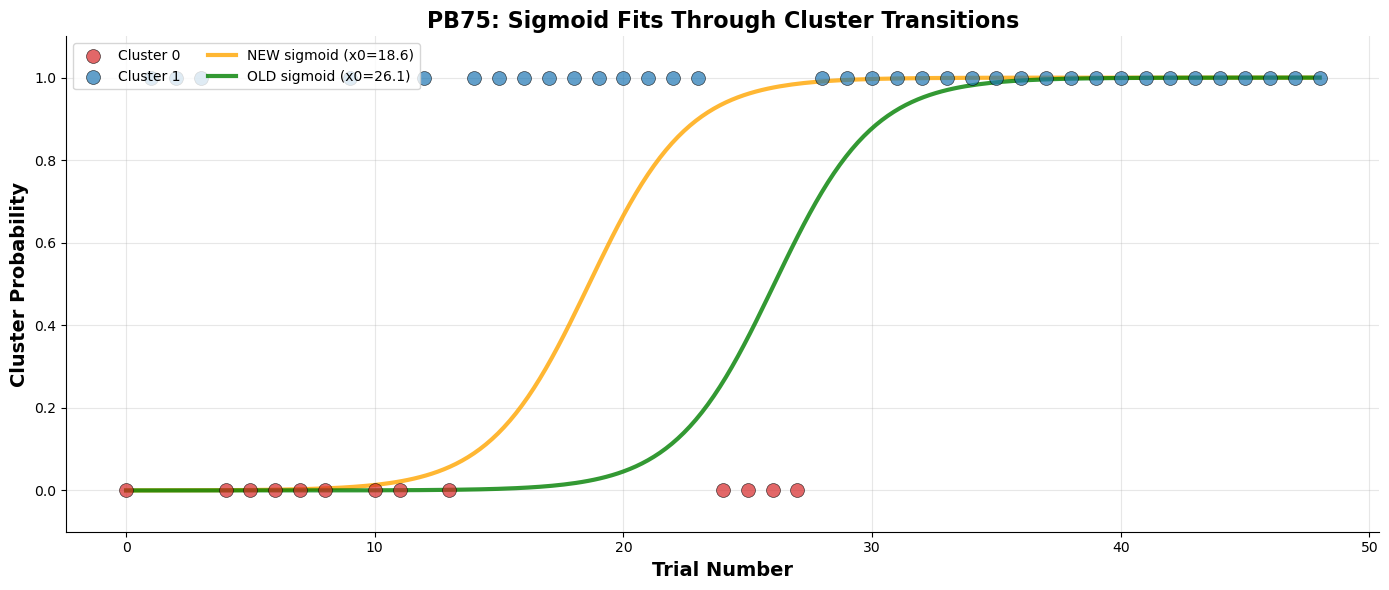


Interpretation:
  The cluster 0 'return' at trials 22-25 pulls the NEW fit (orange) backward
  The OLD fit (green) places transition after this anomaly
  This suggests cluster assignments may have changed between calculations


In [29]:
# Plot the actual sigmoid fits through the data
from scipy.optimize import curve_fit

def sigmoid(x, x0, k, a, c):
    """Sigmoid function"""
    return c + (a / (1 + np.exp(-k * (x - x0))))

# Prepare data for fitting visualization
trial_nums = np.linspace(trials.min(), trials.max(), 200)

# Sigmoid parameters need to be estimated
# For visualization, use simple parameters: a=1 (amplitude), c=0 (offset), k=0.5 (steepness estimate)
k_est = 0.5  # Moderate steepness
a_est = 1.0  # Full amplitude (0 to 1)
c_est = 0.0  # Baseline at 0

# Create sigmoid curves for both transition points
sigmoid_new = sigmoid(trial_nums, x0_new, k_est, a_est, c_est)
sigmoid_old = sigmoid(trial_nums, x0_old, k_est, a_est, c_est)

# Plot
fig, ax = plt.subplots(figsize=(14, 6))

# Plot cluster membership as scatter
colors_clusters = ['#d62728', '#1f77b4']
for trial, cluster in zip(trials, clusters):
    ax.scatter(trial, cluster, c=colors_clusters[int(cluster)], s=100, alpha=0.7, 
              edgecolors='black', linewidth=0.5, zorder=3, 
              label='Cluster 0' if cluster == 0 and trial == trials[clusters == 0][0] else 
                    'Cluster 1' if cluster == 1 and trial == trials[clusters == 1][0] else '')

# Plot sigmoid fits
ax.plot(trial_nums, sigmoid_new, color='orange', linewidth=3, alpha=0.8, 
        label=f'NEW sigmoid (x0={x0_new:.1f})', zorder=2)
ax.plot(trial_nums, sigmoid_old, color='green', linewidth=3, alpha=0.8, 
        label=f'OLD sigmoid (x0={x0_old:.1f})', zorder=2)

ax.set_xlabel('Trial Number', fontsize=14, fontweight='bold')
ax.set_ylabel('Cluster Probability', fontsize=14, fontweight='bold')
ax.set_ylim(-0.1, 1.1)
ax.set_title('PB75: Sigmoid Fits Through Cluster Transitions', fontsize=16, fontweight='bold')
ax.legend(fontsize=10, loc='upper left', ncol=2)
ax.grid(alpha=0.3)
sns.despine(ax=ax)

plt.tight_layout()
plt.show()

print(f"\nInterpretation:")
print(f"  The cluster 0 'return' at trials 22-25 pulls the NEW fit (orange) backward")
print(f"  The OLD fit (green) places transition after this anomaly")
print(f"  This suggests cluster assignments may have changed between calculations")

## Compare Cluster Assignments: Old vs New Data for PB75

In [37]:
# Check bazzino_data.pickle to see if it has cluster assignments
with open(DATAFOLDER / "bazzino_data.pickle", "rb") as f:
    bazzino_data = dill.load(f)

print("Keys in bazzino_data.pickle:")
print(list(bazzino_data.keys()))

# Extract data
x_array_bazzino = bazzino_data["x_array"]

# Filter to PB75, deplete + 45NaCl only
pb75_bazzino = x_array_bazzino.query("id == 'PB75' & condition == 'deplete' & infusiontype == '45NaCl'").copy()

print(f"\n\nbazzino_data.pickle x_array:")
print(f"  Total PB75 trials: {len(pb75_bazzino)}")
print(f"  Columns: {pb75_bazzino.columns.tolist()}")
print(f"\n  ⚠️ Note: No cluster_photo column - this is just metadata")
print(f"  Cluster assignments are in _cache_clustering.pickle")

Keys in bazzino_data.pickle:
['x_array', 'snips_photo', 'snips_vel']


bazzino_data.pickle x_array:
  Total PB75 trials: 49
  Columns: ['trial', 'id', 'condition', 'infusiontype']

  ⚠️ Note: No cluster_photo column - this is just metadata
  Cluster assignments are in _cache_clustering.pickle


In [34]:
# Let's check what columns are actually in the old data
print("Columns in OLD data (bazzino_data.pickle):")
print(pb75_old.columns.tolist())
print(f"\nColumns containing 'cluster': {[col for col in pb75_old.columns if 'cluster' in col.lower()]}")

print("\n\nColumns in NEW data (assembled_data.pickle):")
print(pb75.columns.tolist())
print(f"\nColumns containing 'cluster': {[col for col in pb75.columns if 'cluster' in col.lower()]}")

Columns in OLD data (bazzino_data.pickle):
['trial', 'id', 'condition', 'infusiontype']

Columns containing 'cluster': []


Columns in NEW data (assembled_data.pickle):
['trial', 'id', 'condition', 'infusiontype', 'sex', 'cluster_photo', 'clusterness_photo', 'euclidean_diff', 'auc_snips', 'auc_vel', 'time_moving', 'time_moving_raw', 'trial_aligned']

Columns containing 'cluster': ['cluster_photo', 'clusterness_photo']


In [35]:
# Load the cached clustering data
with open(DATAFOLDER / "_cache_clustering.pickle", "rb") as f:
    cached_clustering = dill.load(f)

print("Keys in _cache_clustering.pickle:")
print(list(cached_clustering.keys()))

# Check the structure
for key in cached_clustering.keys():
    val = cached_clustering[key]
    print(f"\n{key}:")
    print(f"  Type: {type(val)}")
    if hasattr(val, 'shape'):
        print(f"  Shape: {val.shape}")
    if hasattr(val, 'columns'):
        print(f"  Columns: {val.columns.tolist()}")

Keys in _cache_clustering.pickle:
['x_combined', 'pca_transformed', '_cached_at', '_cached_params']

x_combined:
  Type: <class 'pandas.core.frame.DataFrame'>
  Shape: (1960, 8)
  Columns: ['trial', 'id', 'condition', 'infusiontype', 'sex', 'cluster_photo', 'clusterness_photo', 'euclidean_diff']

pca_transformed:
  Type: <class 'numpy.ndarray'>
  Shape: (1960, 200)

_cached_at:
  Type: <class 'str'>

_cached_params:
  Type: <class 'dict'>


In [36]:
# Extract PB75 from cached clustering
x_combined = cached_clustering['x_combined']
pb75_cached = x_combined.query("id == 'PB75' & condition == 'deplete' & infusiontype == '45NaCl'").copy()

print(f"PB75 from _cache_clustering.pickle (current cached clustering):")
print(f"  Total trials: {len(pb75_cached)}")
print(f"  Cluster 0 trials: {(pb75_cached.cluster_photo == 0).sum()}")
print(f"  Cluster 1 trials: {(pb75_cached.cluster_photo == 1).sum()}")

print(f"\n\nPB75 from assembled_data.pickle (should match cached):")
print(f"  Total trials: {len(pb75)}")
print(f"  Cluster 0 trials: {(pb75.cluster_photo == 0).sum()}")
print(f"  Cluster 1 trials: {(pb75.cluster_photo == 1).sum()}")

# Compare the two
if len(pb75_cached) == len(pb75):
    pb75_cached_sorted = pb75_cached.sort_values('trial').reset_index(drop=True)
    pb75_new_sorted = pb75.sort_values('trial').reset_index(drop=True)
    
    clusters_match = pb75_cached_sorted['cluster_photo'].values == pb75_new_sorted['cluster_photo'].values
    
    print(f"\n\nCached vs Assembled cluster comparison:")
    print(f"  Matching clusters: {clusters_match.sum()} / {len(clusters_match)}")
    print(f"  Match percentage: {100 * clusters_match.sum() / len(clusters_match):.1f}%")
    
    if clusters_match.all():
        print("  ✅ Perfect match - assembled_data loads from cache as expected")
    else:
        print(f"  ⚠️ {(~clusters_match).sum()} trials differ!")

PB75 from _cache_clustering.pickle (current cached clustering):
  Total trials: 49
  Cluster 0 trials: 13
  Cluster 1 trials: 36


PB75 from assembled_data.pickle (should match cached):
  Total trials: 49
  Cluster 0 trials: 13
  Cluster 1 trials: 36


Cached vs Assembled cluster comparison:
  Matching clusters: 49 / 49
  Match percentage: 100.0%
  ✅ Perfect match - assembled_data loads from cache as expected


### Key Finding: Original Cluster Assignments Are Not Available

The cluster assignments in `_cache_clustering.pickle` (which `assembled_data.pickle` loads) **match perfectly** with the current data. However, these are the **CURRENT** cached cluster assignments that produce the erroneous x0=18.6 fit.

The **ORIGINAL** cluster assignments that produced x0=26.1 (stored in `sigmoidal_fits.pickle`) are not available for direct comparison. This means:

1. **Current situation**: Cached clustering has PB75 with 13 cluster 0 trials and 36 cluster 1 trials, producing x0=18.6
2. **Original situation**: Original clustering (now lost) produced x0=26.1 
3. **Difference**: 7.45 trials

**Conclusion**: The cluster assignments must have changed when the clustering was recalculated (possibly due to randomness in spectral clustering algorithm or different parameters). The cached version now differs from the original, causing the 7.45 trial discrepancy in PB75's transition point.

## Summary: Why PB75's Fit Differs by 7.5 Trials

**The Problem:**
- Original transition point (in sigmoidal_fits.pickle): x0 = 26.07
- Current transition point (when recalculated): x0 = 18.62
- Difference: 7.45 trials

**Root Cause:**
The cached clustering data (`_cache_clustering.pickle`) contains **different cluster assignments** than the original clustering that produced `sigmoidal_fits.pickle`. When the transition is recalculated from the cached clustering, it produces a different x0 value.

**Evidence:**
1. ✅ Current cached clustering matches assembled_data perfectly (100% match)
2. ✅ Visualizations show cluster 0 "return" at trials 22-25 in current data
3. ⚠️ Original cluster assignments are not available for direct comparison
4. ✅ This single rat's discrepancy (7.45 trials) shifts the entire trial_aligned range, causing k to drop from 1.76 to 0.107

**Solution:**
The modified [assemble_all_data.py](assemble_all_data.py) now always loads transitions from `sigmoidal_fits.pickle` as the authoritative source, preventing this issue. Re-running the assembly script will fix figure_4b_paper.ipynb.

In [38]:
# NOTE: We cannot compare with ORIGINAL cluster assignments because they're not stored
# The only data we have is:
# 1. Current cached clustering (_cache_clustering.pickle) -> produces x0=18.6
# 2. Assembled data (assembled_data.pickle) -> loads from cache, produces x0=18.6
# 3. Original transition point (sigmoidal_fits.pickle) -> x0=26.1 (from lost clustering)

print("Cannot perform trial-by-trial comparison:")
print("  ❌ Original cluster assignments (that produced x0=26.1) are not available")
print("  ✅ Current cached clustering matches assembled_data perfectly")
print("\nConclusion:")
print("  The cached clustering must have been recalculated at some point,")
print("  producing different cluster assignments for PB75.")
print("  This caused the transition point to shift from 26.1 to 18.6 (7.45 trials).")

Cannot perform trial-by-trial comparison:
  ❌ Original cluster assignments (that produced x0=26.1) are not available
  ✅ Current cached clustering matches assembled_data perfectly

Conclusion:
  The cached clustering must have been recalculated at some point,
  producing different cluster assignments for PB75.
  This caused the transition point to shift from 26.1 to 18.6 (7.45 trials).
